# 1. Importing libraries

In [ ]:
# Data processing  
# -----------------------------------------------------------------------  
import pandas as pd  
import numpy as np

# Plots
# -----------------------------------------------------------------------  
import seaborn as sns
import matplotlib.pyplot as plt

# Pandas options  
# -----------------------------------------------------------------------  
pd.options.display.max_colwidth = None
 
# Path configuration for custom module imports  
# -----------------------------------------------------------------------  
import sys  
sys.path.append('../')  # Adds the parent directory to the path for custom module imports  

# Ignore warnings  
# -----------------------------------------------------------------------  
import warnings  
warnings.filterwarnings("ignore")

# Custom functions
# -----------------------------------------------------------------------
from src.support_eda import *

# 2. Data loading

In [3]:
df = pd.read_csv('../data/processed/products_clusters.csv', index_col=0)

df.head()

,Category,Sub-Category,NumberOfCustomers,TotalSales,TotalQuantity,TotalProfit,TotalShippingCost,cluster
ProductID,,,,,,,,
FUR-ADV-10000002,Furniture,Furnishings,2,159.120,3,60.390,10.14,0
FUR-ADV-10000108,Furniture,Furnishings,3,350.070,7,3.360,22.90,0
FUR-ADV-10000183,Furniture,Furnishings,8,974.832,31,-651.738,100.02,0
FUR-ADV-10000188,Furniture,Furnishings,5,124.950,7,4.200,16.53,0
FUR-ADV-10000190,Furniture,Furnishings,1,222.360,2,104.460,32.71,0


In [11]:
df['cluster'].unique()

array([0, 1])

In [12]:
df_0 = df[df['cluster'] == 0]
df_1 = df[df['cluster'] == 1]

# 3. Analysis

Our initial suspicion was that the clusters were grouped by categories. Let’s examine which categories are contained in each cluster.

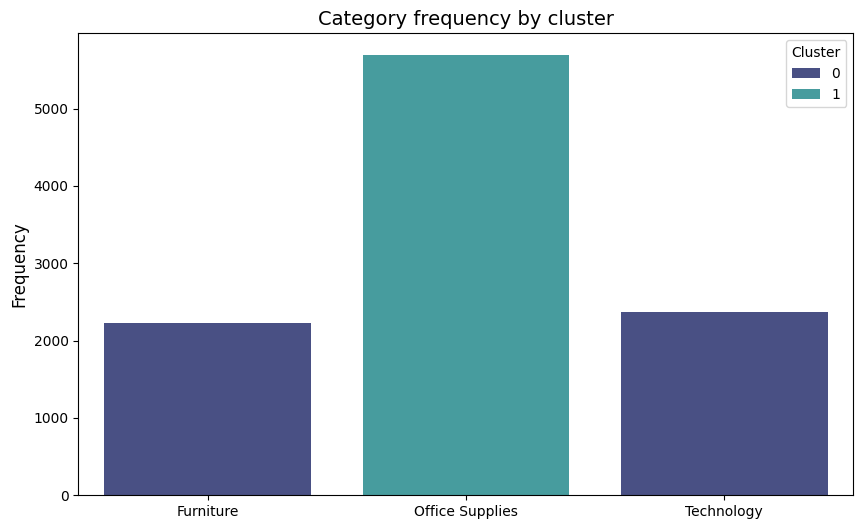

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', hue='cluster', palette='mako')

plt.title('Category frequency by cluster', fontsize=14)
plt.xlabel('')
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Cluster')

plt.show()

We see that one cluster contains all the products from the Office Supplies category, while the other cluster includes products from Furniture and Technology.

## 3.1 Numeric columns

### Whole dataframe

In [46]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
NumberOfCustomers,10292.0,4.96,3.38,1.00,2.00,4.00,7.00,34.00
TotalSales,10292.0,1228.38,2155.23,1.62,164.33,459.05,1358.45,61599.82
TotalQuantity,10292.0,17.33,13.22,1.00,7.00,15.00,24.00,163.00
TotalProfit,10292.0,142.58,595.34,-8879.97,-6.09,37.72,162.87,25199.93
TotalShippingCost,10292.0,131.44,230.67,0.02,16.22,47.32,140.68,3922.85
cluster,10292.0,0.55,0.50,0.00,0.00,1.00,1.00,1.00


### Cluster 0

In [47]:
df_0.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
NumberOfCustomers,4603.0,4.33,2.69,1.00,2.00,4.00,6.00,28.00
TotalSales,4603.0,1923.84,2638.87,7.48,422.33,1048.11,2386.69,61599.82
TotalQuantity,4603.0,15.24,11.33,1.00,6.00,13.00,21.00,106.00
TotalProfit,4603.0,206.17,794.92,-8879.97,-36.82,68.82,317.25,25199.93
TotalShippingCost,4603.0,205.82,282.52,0.05,39.89,106.39,254.62,3922.85
cluster,4603.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Cluster 1

In [48]:
df_1.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
NumberOfCustomers,5689.0,5.47,3.78,1.00,3.00,5.00,7.00,34.00
TotalSales,5689.0,665.68,1435.91,1.62,98.17,242.11,596.25,27453.38
TotalQuantity,5689.0,19.02,14.34,1.00,8.00,16.00,27.00,163.00
TotalProfit,5689.0,91.14,352.23,-4958.16,0.00,27.75,94.36,10345.58
TotalShippingCost,5689.0,71.27,153.60,0.02,9.87,25.35,64.67,3197.94
cluster,5689.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00


## 3.2 Categoric columns

In [32]:
cat_cols = df.select_dtypes(include=['O', 'category']).columns.to_list()

### Whole dataframe

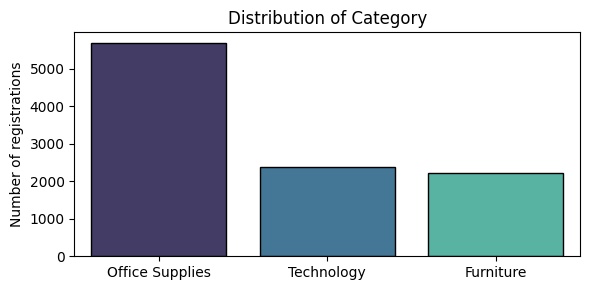

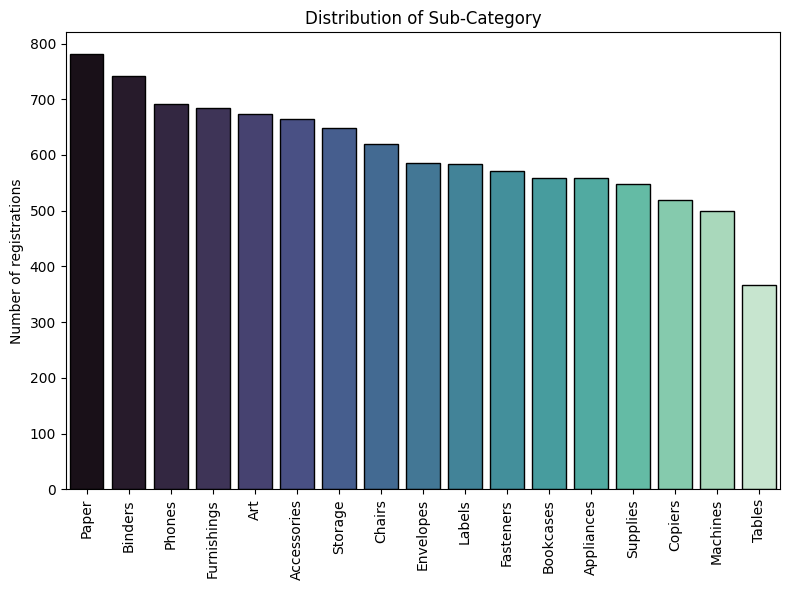

In [8]:
for col in cat_cols:

    if df[col].nunique() > 10:
        rot = 90
        size = (8, 6)

    else: 
        rot = 0
        size = (6, 3)

    plot_categoric_distribution(df, col, size=size, rotation=rot)

### Cluster 0

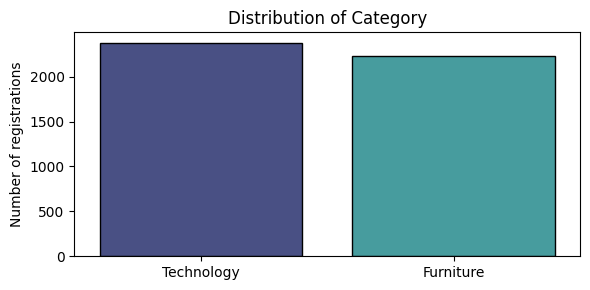

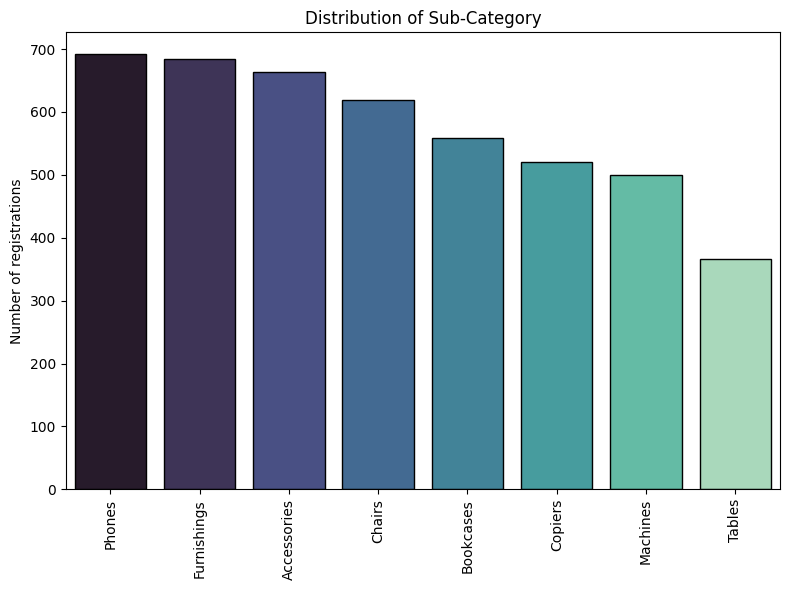

In [13]:
for col in cat_cols:

    if df[col].nunique() > 10:
        rot = 90
        size = (8, 6)

    else: 
        rot = 0
        size = (6, 3)

    plot_categoric_distribution(df_0, col, size=size, rotation=rot)

### Cluster 1

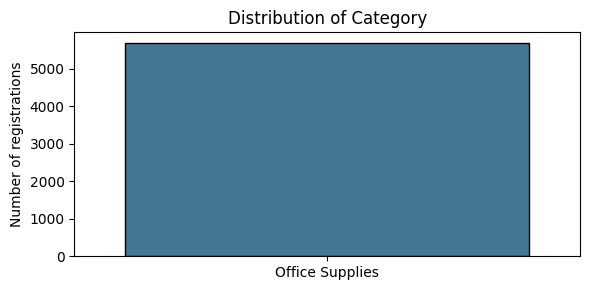

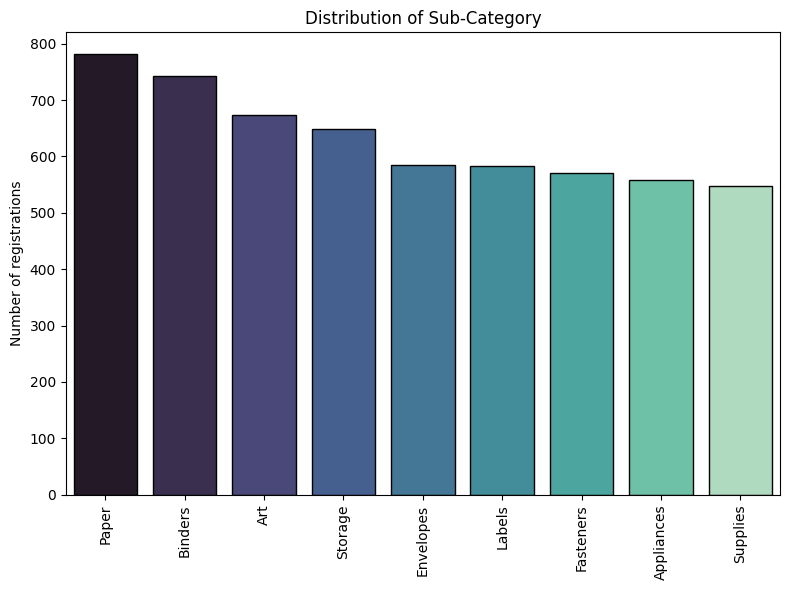

In [14]:
for col in cat_cols:

    if df[col].nunique() > 10:
        rot = 90
        size = (8, 6)

    else: 
        rot = 0
        size = (6, 3)

    plot_categoric_distribution(df_1, col, size=size, rotation=rot)

We observe that the distribution of categories aligns with the previous findings, while the distribution of subcategories depends on the former.

## 3.3 Outliers

### Whole dataframe

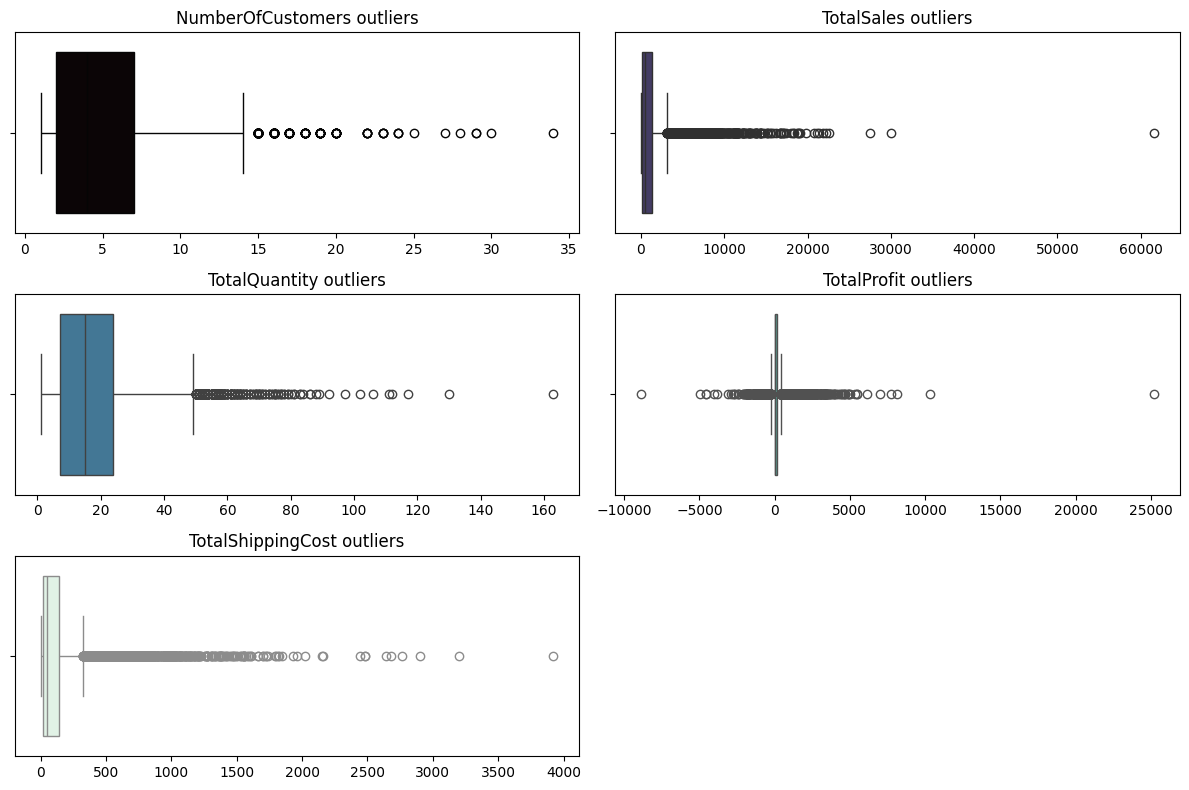

In [33]:
plot_outliers(df.drop(columns='cluster'), size = (12, 8))

### Cluster 0

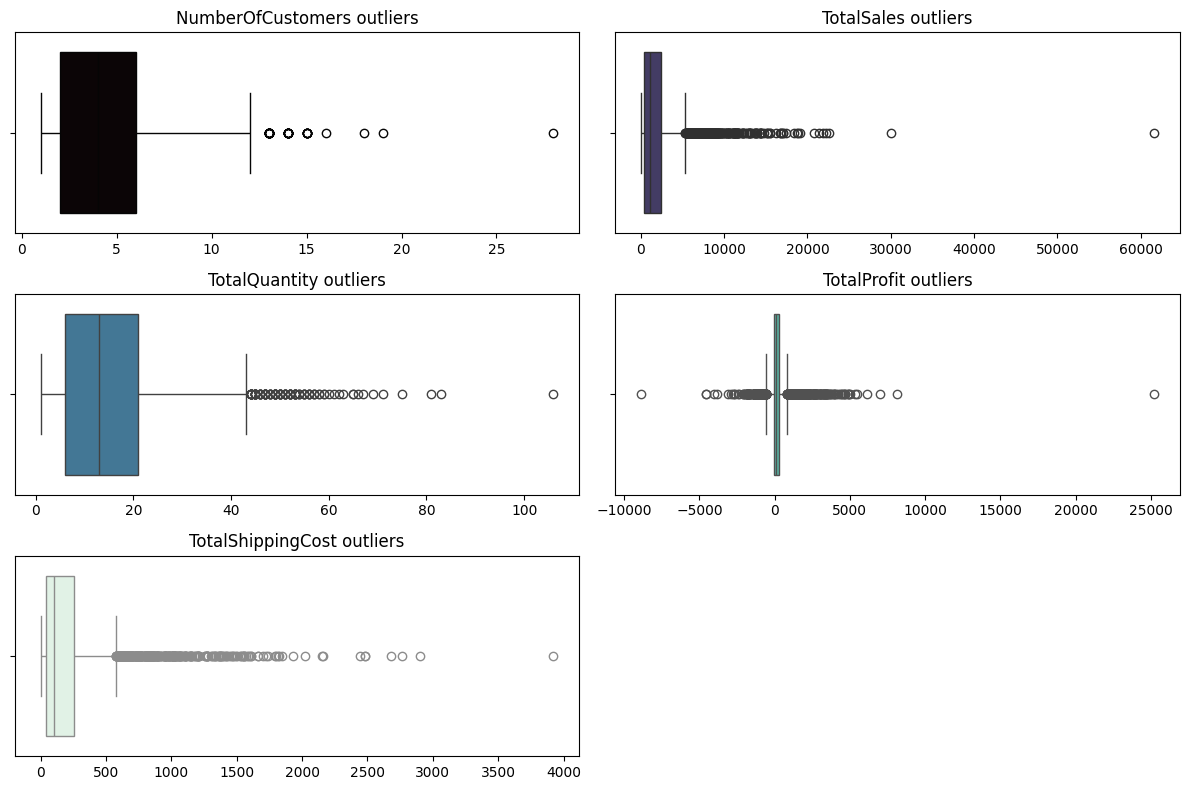

In [35]:
plot_outliers(df_0.drop(columns='cluster'), size = (12, 8))

### Cluster 1

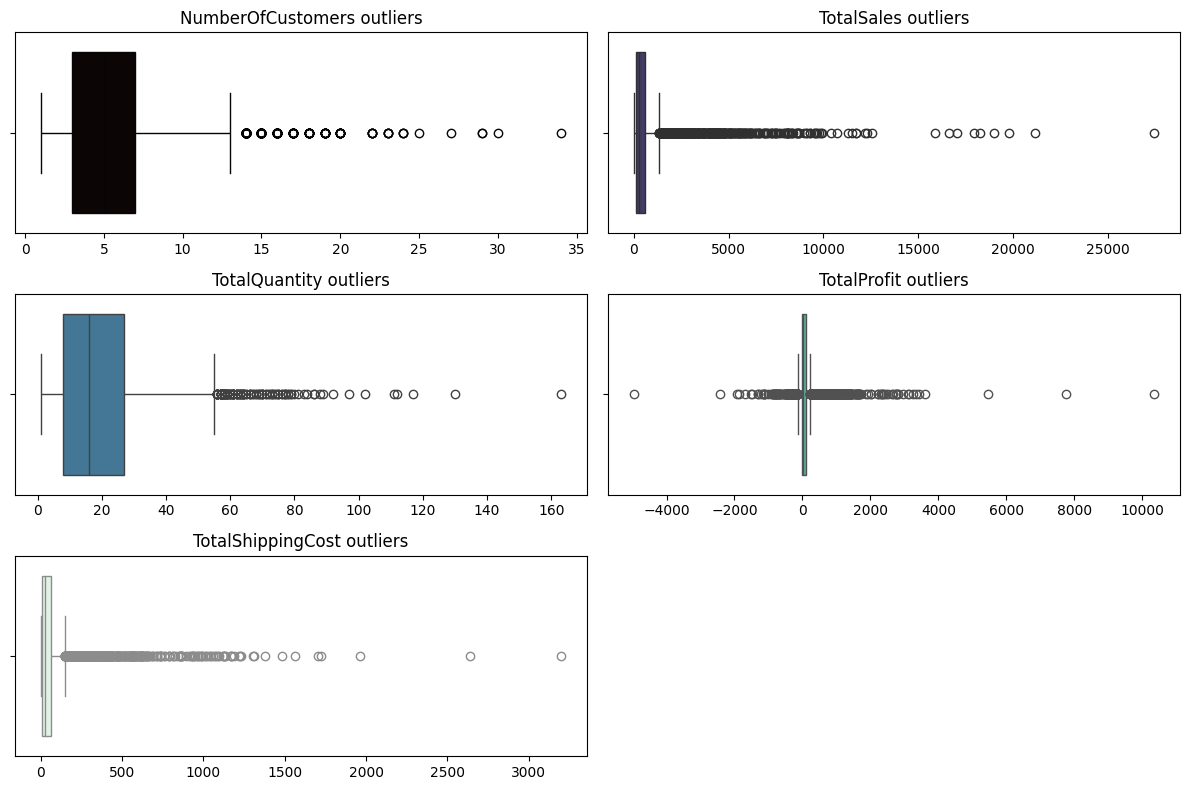

In [36]:
plot_outliers(df_1.drop(columns='cluster'), size = (12, 8))

We see that the distribution of outliers is very similar, with a greater presence in cluster 1.

## 3.4 Correlation Matrix

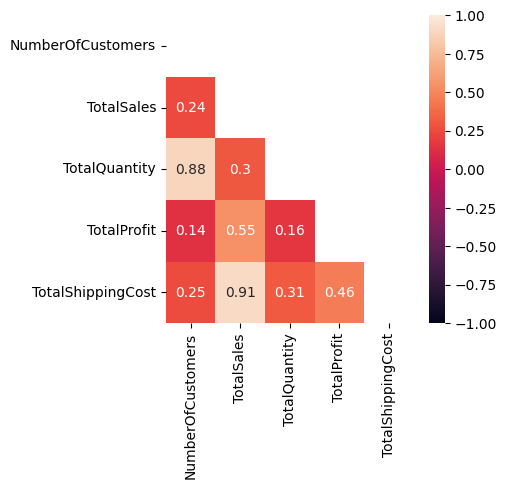

In [44]:
plot_correlation_matrix(df.drop(columns='cluster'), size=(4,4))

### Cluster 0

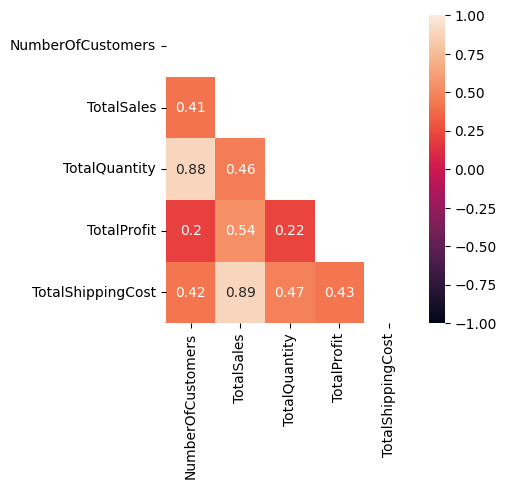

In [43]:
plot_correlation_matrix(df_0.drop(columns='cluster'), size=(4,4))

### Cluster 1

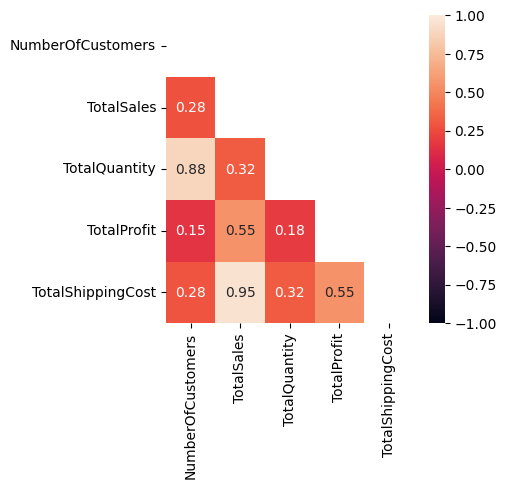

In [45]:
plot_correlation_matrix(df_1.drop(columns='cluster'), size=(4,4))

The correlation is similar in both groups, although there are some differences.  

In general, in cluster 0, the correlations are equal to or slightly higher, except for the correlations between `TotalProfit` + `TotalSales` and `TotalShippingCost`.  

However, the difference is not very significant.

## 3.5 Cluster comparison

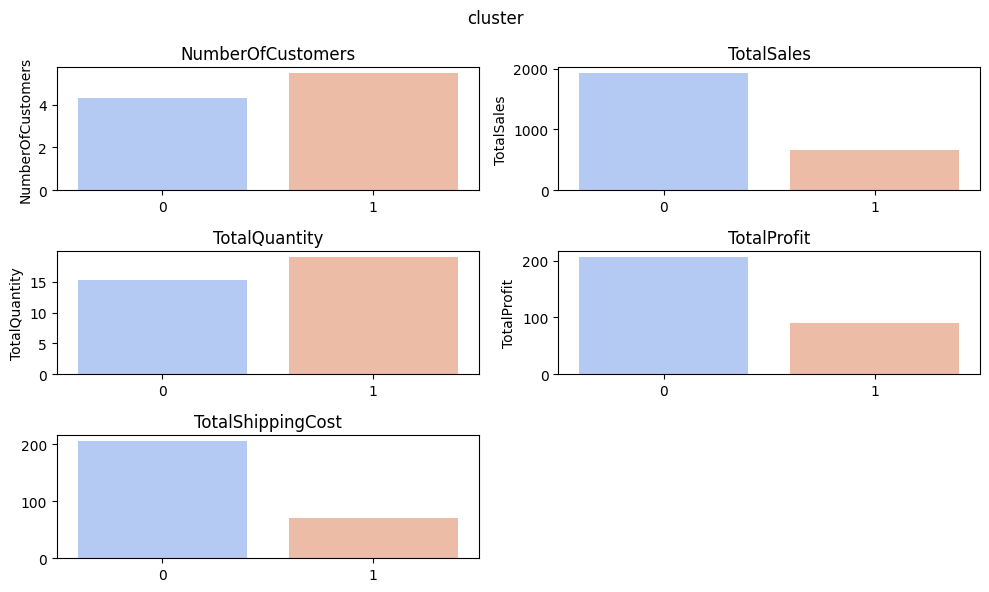

In [22]:
num_cols = df.select_dtypes(include=np.number).drop(columns='cluster').columns

plot_groupby(df, 'cluster', num_cols, size=(10, 6), method='mean')

If we compare the mean values of each cluster, we see that, in general, cluster 1 has lower revenue, costs, and profits but tends to involve larger quantities and a higher number of customers.  

This makes sense since Office Supplies tend to be cheaper products purchased in larger quantities compared to Technology and Furniture. Therefore, we can conclude that this clustering is logical.